# Choose scenario (users' actions needed)

In [1]:
RCP = "RCP45" # either "RCP45" or "RCP85"

# Privode result file name (users' actions needed)

### Change the file names accordingly if you run the MCMC again on your computer and get new result files

In [2]:
SSB_result_file = 'results/Precomputed-CNA-{}-SSB(only-a-few-number-of-variables-are-stored-to-reduce-file-size)'.format(RCP.upper())
Full_result_file = 'results/Precomputed-CNA-{}-FULL(only-a-few-number-of-variables-are-stored-to-reduce-file-size)'.format(RCP.upper())

# Import modules

In [3]:
import sys
import matplotlib.pyplot as plt
import seaborn as sns
monocolor = sns.cubehelix_palette(dark=0, light=1, as_cmap=True)

sys.path.insert(0,"../src")
from tools import *

# Load coordinates

In [4]:
db = dbm.dumb.open('data/Coordinates','r')
my_shelf = shelve.Shelf(db)

cna_lon = my_shelf['cna_lon']
cna_lat = my_shelf['cna_lat']

my_shelf.close()

# Calculate Multi-Model Mean

In [5]:
if RCP == "RCP45":
    db = dbm.dumb.open('data/CNA-RCP45')
else:
    db = dbm.dumb.open('data/CNA-RCP85')
    
CNA = shelve.Shelf(db)

MMM_H = np.zeros(64)
MMM_F = np.zeros(64)

for m in range(38):
    for r in range(CNA['RHm'][m]):
        MMM_H += CNA['XHmr'][m,r,]
    for r in range(CNA['RFm'][m]):
        MMM_F += CNA['XFmr'][m,r,]
        
MMM_H /= sum(CNA['RHm'])
MMM_F /= sum(CNA['RFm'])

MMM_H = MMM_H.reshape(8,8)
MMM_F = MMM_F.reshape(8,8)

db.close()

# Draw figures

## Load data

In [6]:
db = dbm.dumb.open(Full_result_file,'r')
my_shelf = shelve.Shelf(db)

for key in list(my_shelf.keys()):
    globals()[key]=my_shelf[key]

db.close()

result_YH_mean = np.mean(result_YH,axis=0)
result_YF_mean = np.mean(result_YF,axis=0)
 
result_YH_std = np.std(result_YH,axis=0)
result_YF_std = np.std(result_YF,axis=0)

db = dbm.dumb.open(SSB_result_file,'r')
my_shelf = shelve.Shelf(db)

YH = my_shelf['result_YH']
YF = my_shelf['result_YF']

db.close()

result_YH_mean_SSB = np.mean(YH,axis=0)
result_YF_mean_SSB = np.mean(YF,axis=0)
 
result_YH_std_SSB = np.std(YH,axis=0)
result_YF_std_SSB = np.std(YF,axis=0)

## Comparison for the expected climate from different models

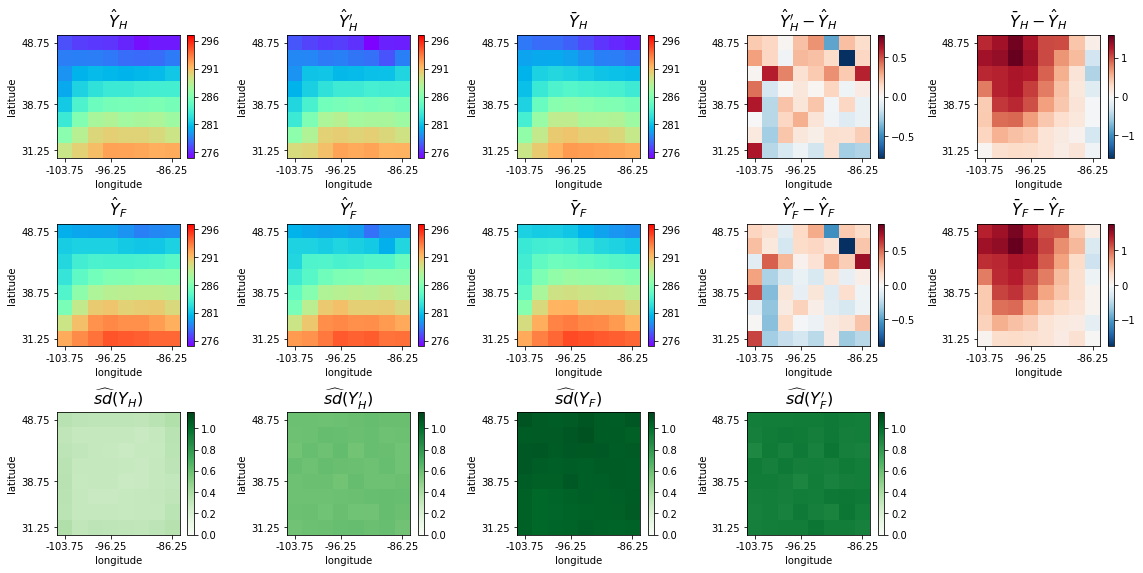

In [7]:
Hmin = 275
Fmax = 297

std_max = max(result_YH_std.max(),result_YH_std_SSB.max(),result_YF_std.max(),result_YF_std_SSB.max())*1.05

import matplotlib.pyplot as plt
from matplotlib import gridspec

fig, ax = plt.subplots(figsize=(16,8))
gridspec.GridSpec(3,5)


plt.subplot(351)
plt.imshow(result_YH_mean.reshape(8,-1),origin='lower',vmin = Hmin,vmax=Fmax, cmap = plt.cm.rainbow)
plt.xticks(np.array([0,3,7]),cna_lon[[0,3,7]])
plt.yticks(np.array([0,3,7]),cna_lat[[0,3,7]])
plt.title(r"$\hatY_H$",fontsize=16,y=1.02)
plt.colorbar(ticks=np.arange(276,300,5))
plt.xlabel("longitude")
plt.ylabel("latitude")


plt.subplot(352)
plt.imshow(result_YH_mean_SSB.reshape(8,-1),origin='lower',vmin = Hmin,vmax=Fmax, cmap = plt.cm.rainbow)
plt.xticks(np.array([0,3,7]),cna_lon[[0,3,7]])
plt.yticks(np.array([0,3,7]),cna_lat[[0,3,7]])
plt.title(r"$\hatY^\prime_H$",fontsize=16,y=1.02)
plt.colorbar(ticks=np.arange(276,300,5))
plt.xlabel("longitude")
plt.ylabel("latitude")


plt.subplot(353)
plt.imshow(MMM_H.reshape(8,-1),origin='lower',vmin = Hmin,vmax=Fmax, cmap = plt.cm.rainbow)
plt.xticks(np.array([0,3,7]),cna_lon[[0,3,7]])
plt.yticks(np.array([0,3,7]),cna_lat[[0,3,7]])
plt.title(r"$\barY_H$",fontsize=16,y=1.02)
plt.colorbar(ticks=np.arange(276,300,5))
plt.xlabel("longitude")
plt.ylabel("latitude")

rge1 = abs(result_YH_mean-result_YH_mean_SSB).max()
plt.subplot(354)
plt.imshow((result_YH_mean_SSB-result_YH_mean).reshape(8,-1),origin='lower', vmin = -rge1, vmax = rge1, cmap = plt.cm.RdBu_r)
plt.xticks(np.array([0,3,7]),cna_lon[[0,3,7]])
plt.yticks(np.array([0,3,7]),cna_lat[[0,3,7]])
plt.title(r"$\hatY^\prime_H-\hatY_H$",fontsize=16,y=1.02)
plt.colorbar()
plt.xlabel("longitude")
plt.ylabel("latitude")


rge2 = abs(result_YH_mean-MMM_H.flatten()).max()
plt.subplot(355)
plt.imshow(MMM_H-result_YH_mean.reshape(8,-1),origin='lower',vmin = -rge2, vmax = rge2, cmap = plt.cm.RdBu_r)
plt.xticks(np.array([0,3,7]),cna_lon[[0,3,7]])
plt.yticks(np.array([0,3,7]),cna_lat[[0,3,7]])
plt.title(r"$\barY_H-\hatY_H$",fontsize=16,y=1.02)
plt.colorbar()
plt.xlabel("longitude")
plt.ylabel("latitude")

plt.subplot(356)
plt.imshow(result_YF_mean.reshape(8,-1),origin='lower',vmin = Hmin,vmax=Fmax, cmap = plt.cm.rainbow)
plt.xticks(np.array([0,3,7]),cna_lon[[0,3,7]])
plt.yticks(np.array([0,3,7]),cna_lat[[0,3,7]])
plt.title(r"$\hatY_F$",fontsize=16,y=1.02)
plt.colorbar(ticks=np.arange(276,300,5))
plt.xlabel("longitude")
plt.ylabel("latitude")


plt.subplot(357)
plt.imshow(result_YF_mean_SSB.reshape(8,-1),origin='lower',cmap = plt.cm.rainbow,vmin = Hmin,vmax=Fmax )
plt.xticks(np.array([0,3,7]),cna_lon[[0,3,7]])
plt.yticks(np.array([0,3,7]),cna_lat[[0,3,7]])
plt.title(r"$\hatY^\prime_F$",fontsize=16,y=1.02)
plt.colorbar(ticks=np.arange(276,300,5))
plt.xlabel("longitude")
plt.ylabel("latitude")

plt.subplot(358)
plt.imshow(MMM_F.reshape(8,-1),origin='lower',vmin = Hmin,vmax=Fmax, cmap = plt.cm.rainbow)
plt.xticks(np.array([0,3,7]),cna_lon[[0,3,7]])
plt.yticks(np.array([0,3,7]),cna_lat[[0,3,7]])
plt.title(r"$\barY_F$",fontsize=16,y=1.02)
plt.colorbar(ticks=np.arange(276,300,5))
plt.xlabel("longitude")
plt.ylabel("latitude")

rge3 = abs(result_YF_mean-result_YF_mean_SSB).max()
plt.subplot(359)
plt.imshow((result_YF_mean_SSB-result_YF_mean).reshape(8,-1),origin='lower',vmin = -rge3, vmax = rge3, cmap = plt.cm.RdBu_r)
plt.xticks(np.array([0,3,7]),cna_lon[[0,3,7]])
plt.yticks(np.array([0,3,7]),cna_lat[[0,3,7]])
plt.title(r"$\hatY^\prime_F-\hatY_F$",fontsize=16,y=1.02)
plt.colorbar()
plt.xlabel("longitude")
plt.ylabel("latitude")

rge4 = abs(result_YF_mean-MMM_F.flatten()).max()
plt.subplot2grid((3,5),(1,4))
plt.imshow(MMM_F-result_YF_mean.reshape(8,-1),origin='lower', vmin = -rge4, vmax = rge4, cmap = plt.cm.RdBu_r)
plt.xticks(np.array([0,3,7]),cna_lon[[0,3,7]])
plt.yticks(np.array([0,3,7]),cna_lat[[0,3,7]])
plt.title(r"$\barY_F-\hatY_F$",fontsize=16,y=1.02)
plt.colorbar()
plt.xlabel("longitude")
plt.ylabel("latitude")

plt.subplot2grid((3,5),(2,0))
plt.imshow(result_YH_std.reshape(8,-1),origin='lower',cmap = plt.cm.Greens, vmin = 0, vmax = std_max)
plt.xticks(np.array([0,3,7]),cna_lon[[0,3,7]])
plt.yticks(np.array([0,3,7]),cna_lat[[0,3,7]])
plt.title(r"$\widehat{sd}(Y_H)$",fontsize=16,y=1.02)
cbar = plt.colorbar()
plt.xlabel("longitude")
plt.ylabel("latitude")


plt.subplot2grid((3,5),(2,1))
plt.imshow(result_YH_std_SSB.reshape(8,-1),origin='lower',cmap = plt.cm.Greens, vmin = 0, vmax = std_max)
plt.xticks(np.array([0,3,7]),cna_lon[[0,3,7]])
plt.yticks(np.array([0,3,7]),cna_lat[[0,3,7]])
plt.title(r"$\widehat{sd}(Y^\prime_H)$",fontsize=16,y=1.02)
cbar = plt.colorbar()
plt.xlabel("longitude")
plt.ylabel("latitude")

plt.subplot2grid((3,5),(2,2))
plt.imshow(result_YF_std.reshape(8,-1),origin='lower',cmap = plt.cm.Greens, vmin = 0, vmax = std_max)
plt.xticks(np.array([0,3,7]),cna_lon[[0,3,7]])
plt.yticks(np.array([0,3,7]),cna_lat[[0,3,7]])
plt.title(r"$\widehat{sd}(Y_F)$",fontsize=16,y=1.02)
cbar = plt.colorbar()
plt.xlabel("longitude")
plt.ylabel("latitude")

plt.subplot2grid((3,5),(2,3))
plt.imshow(result_YF_std_SSB.reshape(8,-1),origin='lower',cmap = plt.cm.Greens, vmin = 0, vmax = std_max)
plt.xticks(np.array([0,3,7]),cna_lon[[0,3,7]])
plt.yticks(np.array([0,3,7]),cna_lat[[0,3,7]])
plt.title(r"$\widehat{sd}(Y^\prime_F)$",fontsize=16,y=1.02)
cbar = plt.colorbar()
plt.xlabel("longitude")
plt.ylabel("latitude")

plt.tight_layout()

## Some MCMC traceplots from the Full model

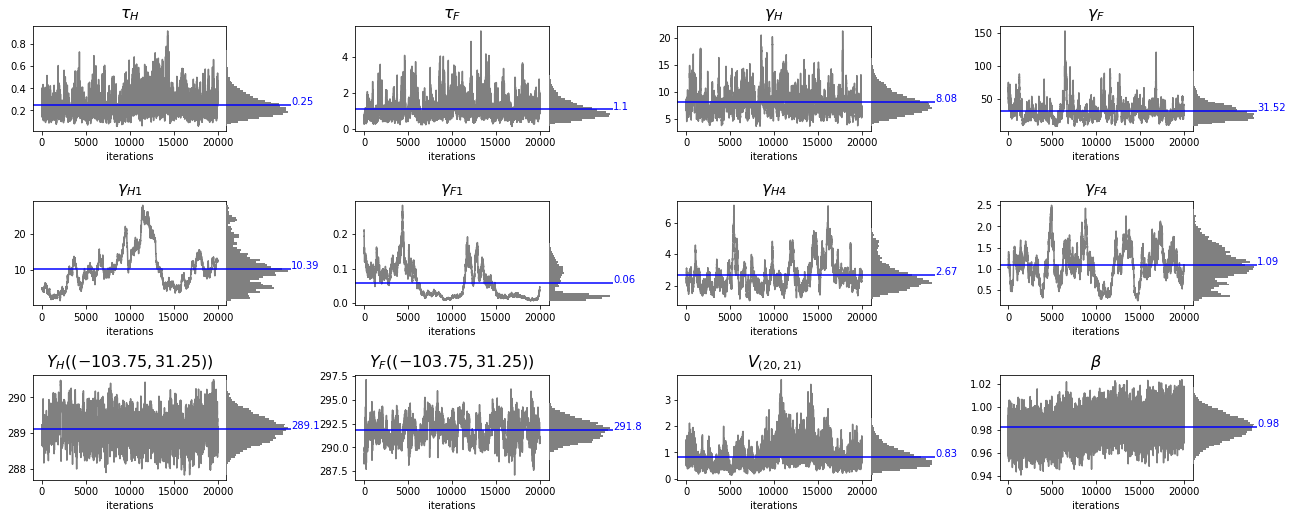

In [8]:
result_YH_one = result_YH[:,0]
result_YF_one = result_YF[:,0]

import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,7))
plt.subplots_adjust(left=0.1, right=0.95, bottom = 0.05, top = 0.95)
plt.subplots_adjust(wspace=0, hspace=100)

gridspec.GridSpec(14,19)

# Tau_H
plt.subplot2grid((14,19), (0,0), colspan=3, rowspan=4)
plt.plot(result_tauH,color='grey')
plt.title(r"$\tau_H$",fontsize=16,y=1.02)
plt.xlabel("iterations")
plt.axhline(np.mean(result_tauH),color='blue')
top, bottom = plt.ylim()

plt.subplot2grid((14,19), (0,3), colspan=1, rowspan=4)
plt.ylim(top,bottom)
plt.hist(result_tauH,bins=50,orientation="horizontal",color='grey')
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.axhline(np.mean(result_tauH),color='blue')
_, right = plt.xlim()
plt.text(right,np.mean(result_tauH),"{:.2f}".format(np.mean(result_tauH)),color='blue')

# Tau_F
plt.subplot2grid((14,19), (0,5), colspan=3, rowspan=4)
plt.plot(result_tauF,color='grey')
plt.title(r"$\tau_F$",fontsize=16,y=1.02)
plt.xlabel("iterations")
plt.axhline(np.mean(result_tauF),color='blue')
top, bottom = plt.ylim()

plt.subplot2grid((14,19), (0,8), colspan=1, rowspan=4)
plt.ylim(top,bottom)
plt.hist(result_tauF,bins=50,orientation="horizontal",color='grey')
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.axhline(np.mean(result_tauF),color='blue')
_, right = plt.xlim()
plt.text(right,np.mean(result_tauF)-0.04,round(np.mean(result_tauF),2),color='blue')


# Gamma_H
plt.subplot2grid((14,19), (0,10), colspan=3, rowspan=4)
plt.plot(result_gammaH,color='grey')
plt.title(r"$\gamma_H$",fontsize=16,y=1.02)
plt.xlabel("iterations")
plt.axhline(np.mean(result_gammaH),color='blue')
top, bottom = plt.ylim()

plt.subplot2grid((14,19), (0,13), colspan=1, rowspan=4)
plt.ylim(top,bottom)
plt.hist(result_gammaH,bins=50,orientation="horizontal",color='grey')
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.axhline(np.mean(result_gammaH),color='blue')
_, right = plt.xlim()
plt.text(right,np.mean(result_gammaH),round(np.mean(result_gammaH),2),color='blue')

# Gamma_F
plt.subplot2grid((14,19), (0,15), colspan=3, rowspan=4)
plt.plot(result_gammaF,color='grey')
plt.title(r"$\gamma_F$",fontsize=16,y=1.02)
plt.xlabel("iterations")
plt.axhline(np.mean(result_gammaF),color='blue')
top, bottom = plt.ylim()

plt.subplot2grid((14,19), (0,18), colspan=1, rowspan=4)
plt.ylim(top,bottom)
plt.hist(result_gammaF,bins=50,orientation="horizontal",color='grey')
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.axhline(np.mean(result_gammaF),color='blue')
_, right = plt.xlim()
plt.text(right,np.mean(result_gammaF),round(np.mean(result_gammaF),2),color='blue')

#-----------------
#-----------------
#-----------------

# Gamma_H1
plt.subplot2grid((14,19), (5,0), colspan=3, rowspan=4)
plt.plot(result_gammaHm[:,0],color='grey')
plt.title(r"$\gamma_{H1}$",fontsize=16,y=1.02)
plt.xlabel("iterations")
plt.axhline(np.mean(result_gammaHm[:,0]),color='blue')
top, bottom = plt.ylim()

plt.subplot2grid((14,19), (5,3), colspan=1, rowspan=4)
plt.ylim(top,bottom)
plt.hist(result_gammaHm[:,0],bins=50,orientation="horizontal",color='grey')
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.axhline(np.mean(result_gammaHm[:,0]),color='blue')
_, right = plt.xlim()
plt.text(right,np.mean(result_gammaHm[:,0]),"{:.2f}".format(np.mean(result_gammaHm[:,0])),color='blue')

# Gamma_F1
plt.subplot2grid((14,19), (5,5), colspan=3, rowspan=4)
plt.plot(result_gammaFm[:,0],color='grey')
plt.title(r"$\gamma_{F1}$",fontsize=16,y=1.02)
plt.xlabel("iterations")
plt.axhline(np.mean(result_gammaFm[:,0]),color='blue')
top, bottom = plt.ylim()

plt.subplot2grid((14,19), (5,8), colspan=1, rowspan=4)
plt.ylim(top,bottom)
plt.hist(result_gammaFm[:,0],bins=50,orientation="horizontal",color='grey')
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.axhline(np.mean(result_gammaFm[:,0]),color='blue')
_, right = plt.xlim()
plt.text(right,np.mean(result_gammaFm[:,0]),"{:.2f}".format(np.mean(result_gammaFm[:,0])),color='blue')


# Gamma_H4
plt.subplot2grid((14,19), (5,10), colspan=3, rowspan=4)
plt.plot(result_gammaHm[:,3],color='grey')
plt.title(r"$\gamma_{H4}$",fontsize=16,y=1.02)
plt.xlabel("iterations")
plt.axhline(np.mean(result_gammaHm[:,3]),color='blue')
top, bottom = plt.ylim()

plt.subplot2grid((14,19), (5,13), colspan=1, rowspan=4)
plt.ylim(top,bottom)
plt.hist(result_gammaHm[:,3],bins=50,orientation="horizontal",color='grey')
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.axhline(np.mean(result_gammaHm[:,3]),color='blue')
_, right = plt.xlim()
plt.text(right,np.mean(result_gammaHm[:,3]),"{:.2f}".format(np.mean(result_gammaHm[:,3])),color='blue')

# Gamma_F4
plt.subplot2grid((14,19), (5,15), colspan=3, rowspan=4)
plt.plot(result_gammaFm[:,3],color='grey')
plt.title(r"$\gamma_{F4}$",fontsize=16,y=1.02)
plt.xlabel("iterations")
plt.axhline(np.mean(result_gammaFm[:,3]),color='blue')
top, bottom = plt.ylim()

plt.subplot2grid((14,19), (5,18), colspan=1, rowspan=4)
plt.ylim(top,bottom)
plt.hist(result_gammaFm[:,3],bins=50,orientation="horizontal",color='grey')
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.axhline(np.mean(result_gammaFm[:,3]),color='blue')
_, right = plt.xlim()
plt.text(right,np.mean(result_gammaFm[:,3]),"{:.2f}".format(np.mean(result_gammaFm[:,3])),color='blue')

# -----------------------------
# -----------------------------

# Y_H
plt.subplot2grid((14,19), (10,0), colspan=3, rowspan=4)
plt.plot(result_YH_one,color='grey')
plt.title(r"$Y_H((-103.75,31.25))$",fontsize=16,y=1.02)
plt.xlabel("iterations")
plt.axhline(np.mean(result_YH_one),color='blue')
top, bottom = plt.ylim()

plt.subplot2grid((14,19), (10,3), colspan=1, rowspan=4)
plt.ylim(top,bottom)
plt.hist(result_YH_one,bins=50,orientation="horizontal",color='grey')
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.axhline(np.mean(result_YH_one),color='blue')
_, right = plt.xlim()
plt.text(right,np.mean(result_YH_one),round(np.mean(result_YH_one),1),color='blue')

# Y_F
plt.subplot2grid((14,19), (10,5), colspan=3, rowspan=4)
plt.plot(result_YF_one,color='grey')
plt.title(r"$Y_F((-103.75,31.25))$",fontsize=16,y=1.02)
plt.xlabel("iterations")
plt.axhline(np.mean(result_YF_one),color='blue')
top, bottom = plt.ylim()

plt.subplot2grid((14,19), (10,8), colspan=1, rowspan=4)
plt.ylim(top,bottom)
plt.hist(result_YF_one,bins=50,orientation="horizontal",color='grey')
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.axhline(np.mean(result_YF_one),color='blue')
_, right = plt.xlim()
plt.text(right,np.mean(result_YF_one),round(np.mean(result_YF_one),1),color='blue')

# V
plt.subplot2grid((14,19), (10,10), colspan=3, rowspan=4)
plt.plot(result_V_one,color='grey')
plt.title(r"$V_{(20,21)}$",fontsize=16,y=1.02)
plt.xlabel("iterations")
plt.axhline(np.mean(result_V_one),color='blue')
top, bottom = plt.ylim()

plt.subplot2grid((14,19), (10,13), colspan=1, rowspan=4)
plt.ylim(top,bottom)
plt.hist(result_V_one,bins=50,orientation="horizontal",color='grey')
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.axhline(np.mean(result_V_one),color='blue')
_, right = plt.xlim()
plt.text(right,np.mean(result_V_one),round(np.mean(result_V_one),2),color='blue')


# Beta
plt.subplot2grid((14,19), (10,15), colspan=3, rowspan=4)
plt.plot(result_beta,color='grey')
plt.title(r"$\beta$",fontsize=16,y=1.02)
plt.xlabel("iterations")
plt.axhline(np.mean(result_beta),color='blue')
top, bottom = plt.ylim()

plt.subplot2grid((14,19), (10,18), colspan=1, rowspan=4)
plt.ylim(top,bottom)
plt.hist(result_beta,bins=50,orientation="horizontal",color='grey')
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.axhline(np.mean(result_beta),color='blue')
_, right = plt.xlim()
plt.text(right,np.mean(result_beta),round(np.mean(result_beta),2),color='blue');